In [7]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math


In [35]:
import pandas as pd

filename = f"yt_metadata_filtered_trump.jsonl.gz"
# 读取jsonl.gz文件并将其作为DataFrame
df = pd.read_json(filename, lines=True, compression='gzip')



df.to_csv('filtered.csv', index=False)



In [36]:
df['categories'] = df['categories'].replace("", "Undefined")


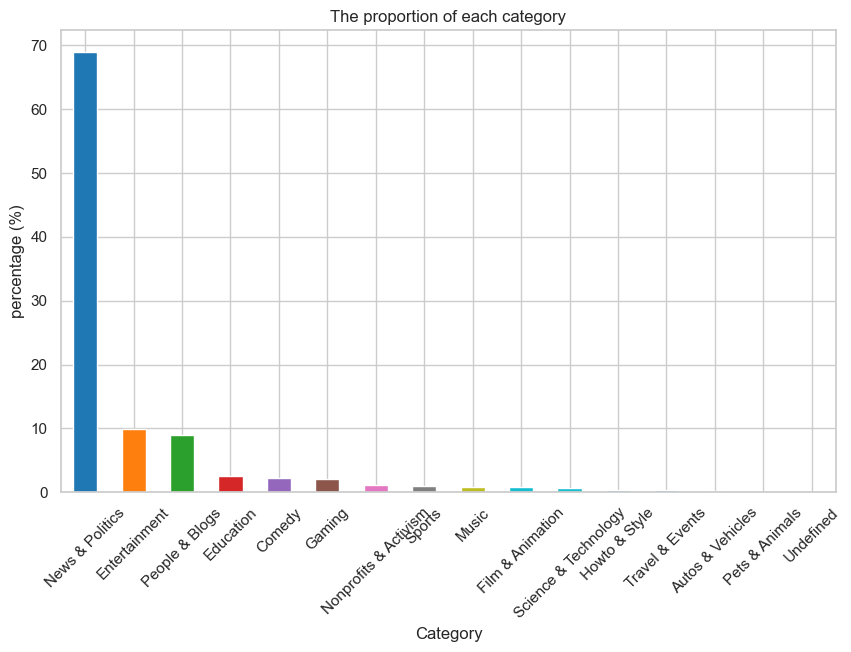

In [37]:
# 统计每个category的数量
category_counts = df['categories'].value_counts()
colors = plt.cm.tab10(range(len(category_counts)))

category_percentages = category_counts / category_counts.sum() * 100

# 绘制条形图
plt.figure(figsize=(10, 6))
category_percentages.plot(kind='bar', color=colors)
plt.title(f"The proportion of each category")
plt.xlabel('Category')
plt.ylabel(f"percentage (%)")
plt.xticks(rotation=45)
plt.show()

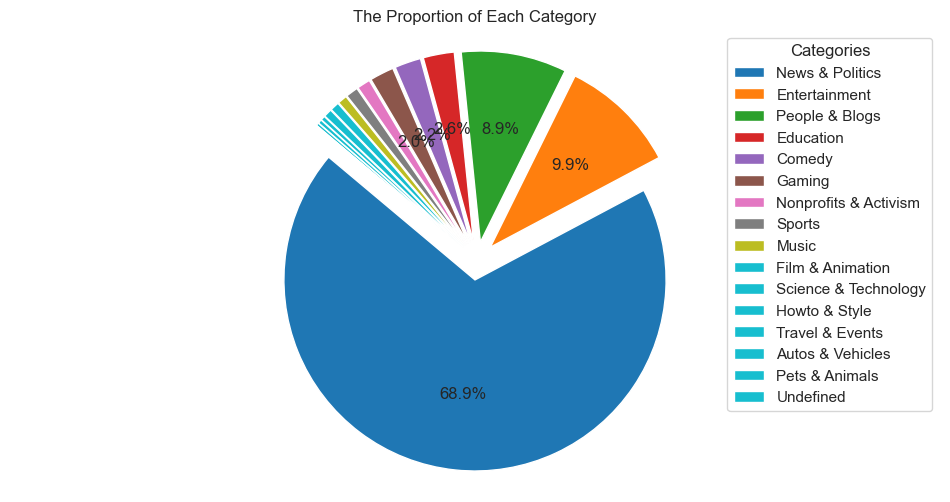

In [38]:
category_counts = df['categories'].value_counts()
colors = plt.cm.tab10(range(len(category_counts)))

category_percentages = category_counts / category_counts.sum() * 100

def func(pct):
    return f'{pct:.1f}%' if pct >= 1.5 else ''

# 绘制饼形图
plt.figure(figsize=(12, 6))
explode = [0.1] * len(category_percentages)
plt.pie(category_percentages, colors=colors, startangle=140, explode=explode, autopct=func)

plt.legend(labels=category_percentages.index, loc='upper right', title='Categories')

plt.title(f"The Proportion of Each Category")
plt.axis('equal')  # 使饼图为圆形
plt.show()

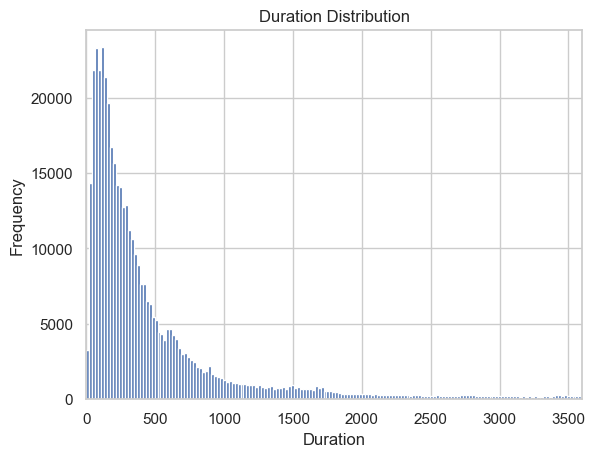

In [39]:
plt.hist(df['duration'], bins=2000)
plt.title('Duration Distribution')
plt.xlabel('Duration')
plt.ylabel('Frequency')

# 设置y轴为对数尺度
# plt.yscale('log')
plt.xlim(0, 3600)

plt.show()


In [40]:
df.duration.describe()

count    447616.000000
mean        767.199425
std        2071.631538
min           1.000000
25%         134.000000
50%         283.000000
75%         622.000000
max       43029.000000
Name: duration, dtype: float64

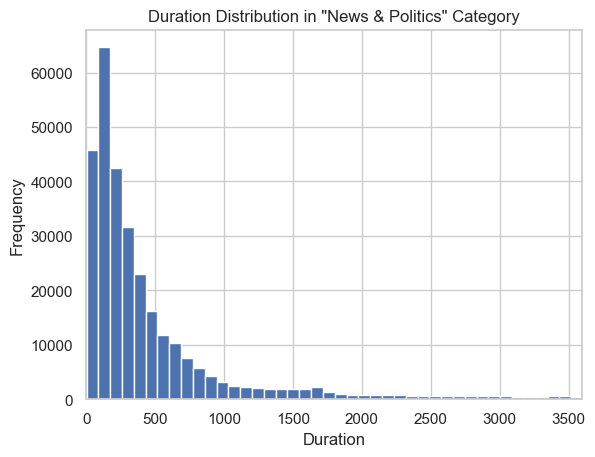

In [41]:
# 筛选出"News & Politics"类别的数据
news_politics_df = df[df['categories'] == 'News & Politics']

# 绘制时长分布直方图
plt.hist(news_politics_df['duration'], bins=500)
plt.title('Duration Distribution in "News & Politics" Category')
plt.xlabel('Duration')
plt.ylabel('Frequency')

plt.xlim(0, 3600)
plt.show()


In [42]:
news_politics_df.duration.describe()

count    308326.000000
mean        732.407419
std        2194.871575
min           1.000000
25%         126.000000
50%         262.000000
75%         570.000000
max       42903.000000
Name: duration, dtype: float64

In [43]:
category_duration_summary = df.groupby('categories')['duration'].describe()

In [44]:

category_duration_summary.sort_values(by='count', ascending=False, inplace=True)
category_duration_summary


,count,mean,std,min,25%,50%,75%,max
categories,,,,,,,,
News & Politics,308326.0,732.407419,2194.871575,1.0,126.00,262.0,570.00,42903.0
Entertainment,44392.0,703.425955,1748.632774,1.0,174.00,298.0,516.00,42901.0
People & Blogs,39932.0,788.854778,1429.676845,1.0,137.00,325.0,817.00,27169.0
Education,11766.0,1314.361890,1950.179505,2.0,254.00,603.0,1450.50,34462.0
Comedy,9971.0,698.589209,1563.931519,1.0,140.00,281.0,602.00,36085.0
Gaming,9169.0,1173.646417,2313.718797,1.0,299.00,643.0,1186.00,43029.0
Nonprofits & Activism,5019.0,1188.268579,2071.774160,5.0,172.00,422.0,1121.50,42901.0
Sports,4650.0,1367.869892,3228.376037,1.0,115.00,244.0,748.00,41961.0
Music,3573.0,548.433529,1370.319355,3.0,135.00,216.0,383.00,36002.0


In [45]:
category_duration_summary.to_csv('category_view_count_summary.csv')


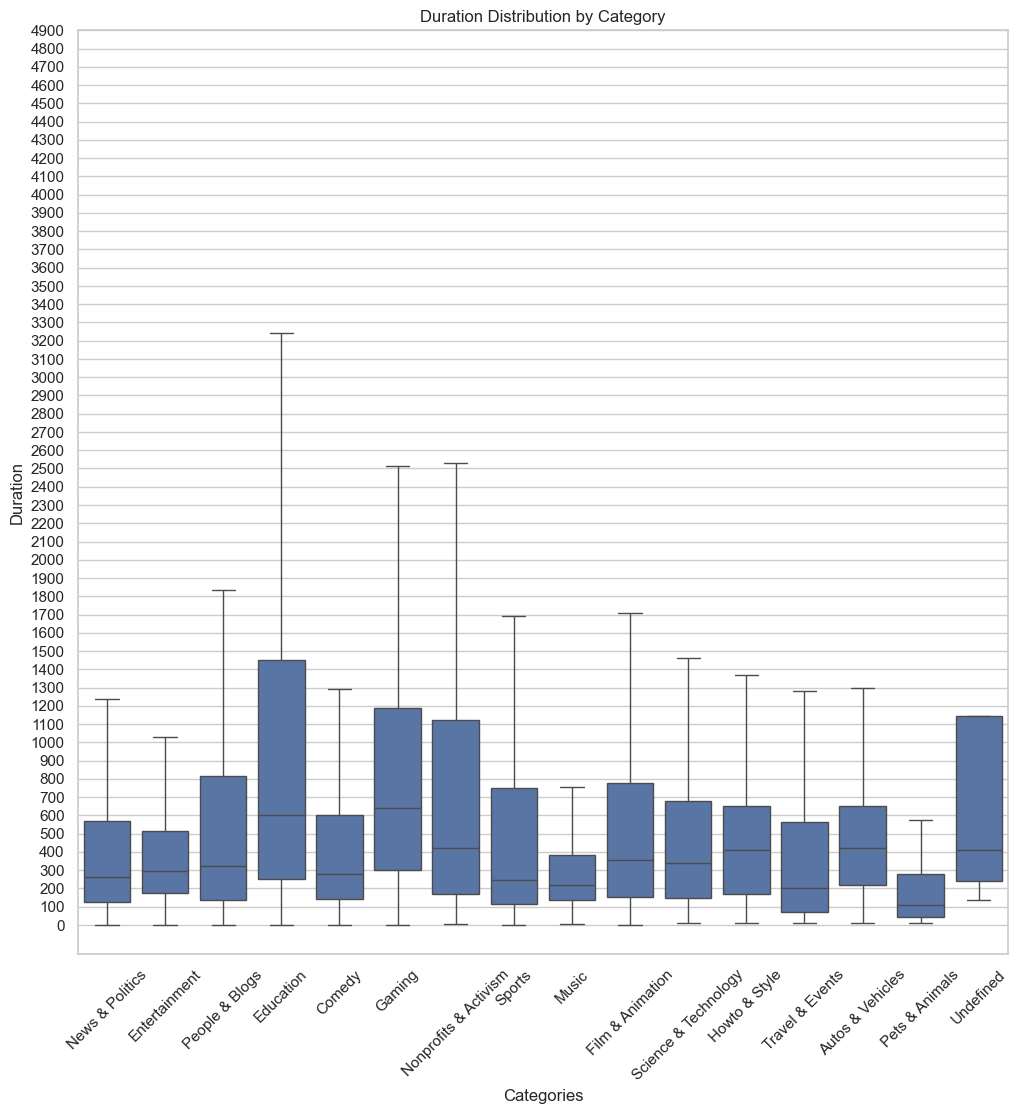

In [46]:
sns.set_theme(style="whitegrid")

category_order = df['categories'].value_counts().index

# 创建箱形图
plt.figure(figsize=(12, 12))
sns.boxplot(x='categories', y='duration', data=df, order=category_order, showfliers=False)

# 添加标题和标签
plt.title('Duration Distribution by Category')
plt.xlabel('Categories')
plt.ylabel('Duration')

plt.yticks(ticks=range(0, 5000, 100))

# 显示图形
plt.xticks(rotation=45)  # 如果类别名称较长，可以旋转x轴标签
plt.show()

In [47]:
df['likes_per_1000_views'] = df.apply(
    lambda row: (row['like_count'] / row['view_count']) * 1000 if row['view_count'] > 0 else 0,
    axis=1
)

In [48]:
df.head(10)

,categories,channel_id,crawl_date,description,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count,keywords,likes_per_1000_views
0,Gaming,UCzWm1-4XF7AHxVUTkHCM1uw,2019-11-17 06:28:33.001044,,6.0,iWbFNJaaHrw,270,47.0,"video,games,retrogamer3,ed,findlay,Trump,Ameri...",America's Retribution Term 2 Launched,2019-05-08 00:00:00,445.0,trump,105.617978
1,Gaming,UCzWm1-4XF7AHxVUTkHCM1uw,2019-11-17 06:28:33.563584,,8.0,MRaGK43Ux-k,109,52.0,"video,games,retrogamer3,ed,findlay,America's R...",America's Retribution Term 2 promo!,2019-04-26 00:00:00,752.0,trump,69.148936
2,Gaming,UCzWm1-4XF7AHxVUTkHCM1uw,2019-11-17 06:28:36.350067,,4.0,-91qrjpgRw0,58,26.0,"video,games,retrogamer3,ed,findlay,Hitler,Natz...",The last mini boss is done. The fuhrer.,2019-02-17 00:00:00,453.0,trump,57.395143
3,Gaming,UCzWm1-4XF7AHxVUTkHCM1uw,2019-11-17 06:28:36.930863,,8.0,nq9_WZXjjCI,71,25.0,"video,games,retrogamer3,ed,findlay,Elizabeth W...",Elizabeth Warren Boss Finished!,2019-02-07 00:00:00,415.0,trump,60.240964
4,Gaming,UCzWm1-4XF7AHxVUTkHCM1uw,2019-11-17 06:28:39.777410,,24.0,Kh-s-TEnqWY,7508,43.0,"RetroGamer3,Live Stream,Action-adventure Game ...",America's Retribution -Stream-,2018-09-01 00:00:00,661.0,trump,65.052950
5,Gaming,UCzWm1-4XF7AHxVUTkHCM1uw,2019-11-17 06:28:43.160341,,9.0,ngPCo6GCha4,131,29.0,"video,games,retrogamer3,ed,findlay,America's R...",Journey to George Soros [Hell Stage],2018-07-19 00:00:00,547.0,trump,53.016453
6,Gaming,UCzWm1-4XF7AHxVUTkHCM1uw,2019-11-17 06:28:43.689195,,10.0,dmbCbZl9U8o,199,64.0,"video,games,retrogamer3,ed,findlay,America's R...",Gavin McInnes Plays America's Retribution!,2018-07-02 00:00:00,942.0,trump,67.940552
7,Gaming,UCzWm1-4XF7AHxVUTkHCM1uw,2019-11-17 06:28:44.285750,,7.0,8UG2f6elpjk,105,16.0,"video,games,retrogamer3,ed,findlay,Trump,Ameri...",America's Retribution Term 2 Mission 2,2018-06-14 00:00:00,436.0,trump,36.697248
8,Gaming,UCzWm1-4XF7AHxVUTkHCM1uw,2019-11-17 06:28:44.941987,,4.0,Embxg1vmHAs,79,31.0,"games,retrogamer3,ed,findlay,Trump,America's R...",Stormy Daniels Boss Complete!,2018-06-09 00:00:00,662.0,trump,46.827795
9,Gaming,UCzWm1-4XF7AHxVUTkHCM1uw,2019-11-17 06:28:45.490836,,9.0,lGKs41ltekc,388,53.0,"video,games,retrogamer3,ed,findlay,films,Ameri...",America's Retribution Term 2!,2018-05-22 00:00:00,1540.0,trump,34.415584


In [49]:
category_like_per_views_summary = df.groupby('categories')['likes_per_1000_views'].describe()
category_like_per_views_summary.sort_values(by='count', ascending=False, inplace=True)
category_like_per_views_summary

,count,mean,std,min,25%,50%,75%,max
categories,,,,,,,,
News & Politics,304374.0,25.979720,29.148928,0.0,8.219178,16.304348,32.568383,1000.000000
Entertainment,43894.0,40.784088,121.086432,0.0,12.529153,33.527605,59.070144,24400.000000
People & Blogs,39458.0,45.373798,52.978175,0.0,12.642926,34.482759,66.798506,4891.089109
Education,11444.0,38.558183,35.736939,0.0,14.669286,28.828829,53.456420,1000.000000
Comedy,9923.0,38.035488,39.107320,0.0,11.881097,22.918338,52.090248,500.000000
Gaming,9140.0,25.187845,32.269783,0.0,6.884454,15.206902,32.097465,924.528302
Nonprofits & Activism,4921.0,46.843591,37.064816,0.0,18.947368,37.591687,66.363223,250.569476
Sports,4595.0,21.594627,28.119890,0.0,6.535948,13.369674,29.682115,1000.000000
Music,3505.0,28.109582,33.103089,0.0,10.000000,19.375905,33.333333,512.396694


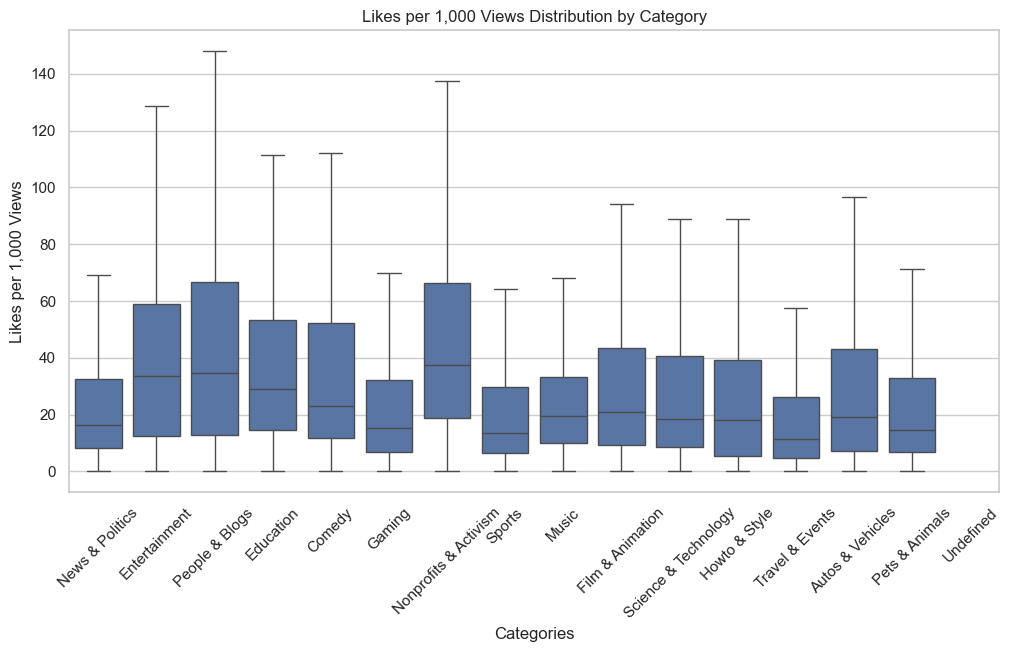

In [50]:
sns.set_theme(style="whitegrid")

category_order = df['categories'].value_counts().index

# 创建箱形图
plt.figure(figsize=(12, 6))
sns.boxplot(x='categories', y='likes_per_1000_views', data=df, order=category_order, showfliers=False)

# 添加标题和标签
plt.title('Likes per 1,000 Views Distribution by Category')
plt.xlabel('Categories')
plt.ylabel('Likes per 1,000 Views')

# plt.yticks(ticks=range(0, 5000, 100))

# 显示图形
plt.xticks(rotation=45)  # 如果类别名称较长，可以旋转x轴标签
plt.show()

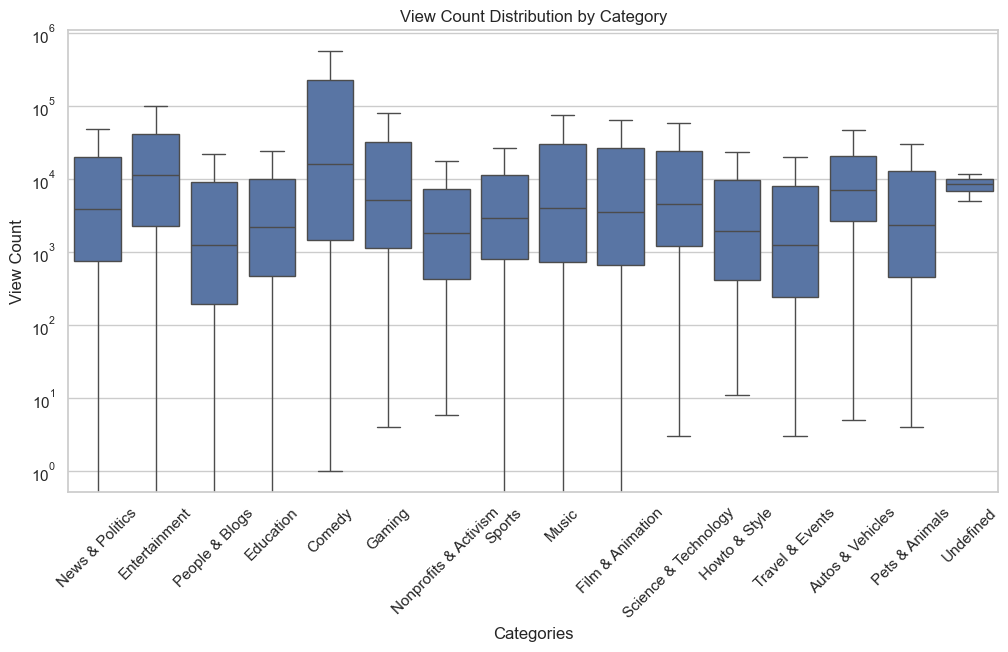

In [51]:
sns.set_theme(style="whitegrid")

category_order = df['categories'].value_counts().index

# 创建箱形图
plt.figure(figsize=(12, 6))
sns.boxplot(x='categories', y='view_count', data=df, order=category_order, showfliers=False)

# 添加标题和标签
plt.title('View Count Distribution by Category')
plt.xlabel('Categories')
plt.ylabel('View Count')
plt.yscale('log')

# plt.yticks(ticks=range(0, 5000, 100))

# 显示图形
plt.xticks(rotation=45)  # 如果类别名称较长，可以旋转x轴标签
plt.show()

In [52]:
category_view_count_summary = df.groupby('categories')['view_count'].describe()
category_view_count_summary.sort_values(by='50%', ascending=False, inplace=True)
category_view_count_summary

,count,mean,std,min,25%,50%,75%,max
categories,,,,,,,,
Comedy,9971.0,388805.676562,1.396608e+06,1.0,1481.50,16066.0,228465.00,54082961.0
Entertainment,44391.0,147404.477980,1.011043e+06,0.0,2269.50,11538.0,42174.50,76197220.0
Undefined,4.0,8532.750000,2.876244e+03,5022.0,6996.00,8680.0,10216.75,11749.0
Autos & Vehicles,1068.0,63927.905431,4.985391e+05,5.0,2713.50,7249.0,20775.50,14523031.0
Gaming,9169.0,110893.922020,8.884731e+05,4.0,1146.00,5282.0,32715.00,50645615.0
Science & Technology,3106.0,75589.717321,5.523176e+05,3.0,1229.75,4660.5,24206.25,19945974.0
Music,3573.0,453726.297229,5.655532e+06,0.0,745.00,4078.0,30971.00,220409674.0
News & Politics,308301.0,37963.797422,2.125876e+05,0.0,767.00,3987.0,20314.00,50083777.0
Film & Animation,3400.0,130707.500588,6.687331e+05,0.0,679.00,3553.0,26565.50,20531313.0


(0.0, 50000000.0)

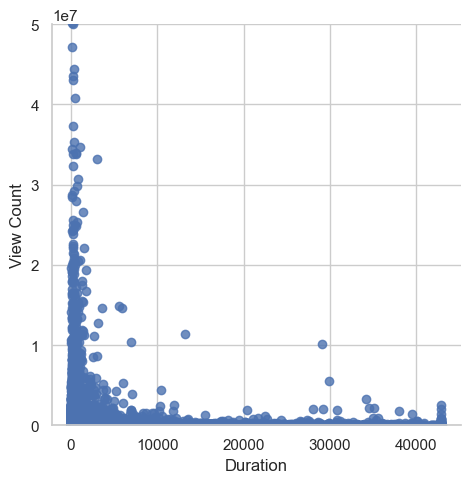

In [53]:
sns.lmplot(x='duration',y='view_count', data=df)
plt.xlabel("Duration")
plt.ylabel("View Count")
# plt.yscale('log')
plt.ylim(0,50000000)

In [54]:
df[df['likes_per_1000_views'] >= 24400]['title']


240080    TRUMP WAS SABOTAGED! YOU GOTTA SEE SICK THING ...
Name: title, dtype: object